<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#PREDICTING-FUTURE-PRODUCT-PRICES-USING-FACEBOOK-PROPHET" data-toc-modified-id="PREDICTING-FUTURE-PRODUCT-PRICES-USING-FACEBOOK-PROPHET-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>PREDICTING FUTURE PRODUCT PRICES USING FACEBOOK PROPHET</a></span></li><li><span><a href="#TASK-#1:-PROJECT-OVERIEW" data-toc-modified-id="TASK-#1:-PROJECT-OVERIEW-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>TASK #1: PROJECT OVERIEW</a></span></li><li><span><a href="#TASK-#2:-IMPORT-LIBRARIES-AND-DATASET" data-toc-modified-id="TASK-#2:-IMPORT-LIBRARIES-AND-DATASET-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>TASK #2: IMPORT LIBRARIES AND DATASET</a></span></li><li><span><a href="#TASK-#3:-EXPLORE-DATASET" data-toc-modified-id="TASK-#3:-EXPLORE-DATASET-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>TASK #3: EXPLORE DATASET</a></span></li><li><span><a href="#TASK-4:-PREPARE-THE-DATA-BEFORE-APPLYING-FACEBOOK-PROPHET-TOOL" data-toc-modified-id="TASK-4:-PREPARE-THE-DATA-BEFORE-APPLYING-FACEBOOK-PROPHET-TOOL-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>TASK 4: PREPARE THE DATA BEFORE APPLYING FACEBOOK PROPHET TOOL</a></span></li><li><span><a href="#TASK-5:-UNDERSTAND-INTUITION-BEHIND-FACEBOOK-PROPHET" data-toc-modified-id="TASK-5:-UNDERSTAND-INTUITION-BEHIND-FACEBOOK-PROPHET-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>TASK 5: UNDERSTAND INTUITION BEHIND FACEBOOK PROPHET</a></span></li><li><span><a href="#TASK-6:-DEVELOP-MODEL-AND-MAKE-PREDICTIONS---PART-A" data-toc-modified-id="TASK-6:-DEVELOP-MODEL-AND-MAKE-PREDICTIONS---PART-A-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>TASK 6: DEVELOP MODEL AND MAKE PREDICTIONS - PART A</a></span></li><li><span><a href="#TASK-7:-DEVELOP-MODEL-AND-MAKE-PREDICTIONS-(REGION-SPECIFIC)---PART-B" data-toc-modified-id="TASK-7:-DEVELOP-MODEL-AND-MAKE-PREDICTIONS-(REGION-SPECIFIC)---PART-B-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>TASK 7: DEVELOP MODEL AND MAKE PREDICTIONS (REGION SPECIFIC) - PART B</a></span></li><li><span><a href="#GREAT-JOB!" data-toc-modified-id="GREAT-JOB!-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>GREAT JOB!</a></span></li></ul></div>

# PREDICTING FUTURE PRODUCT PRICES USING FACEBOOK PROPHET 



# TASK #1: PROJECT OVERIEW 


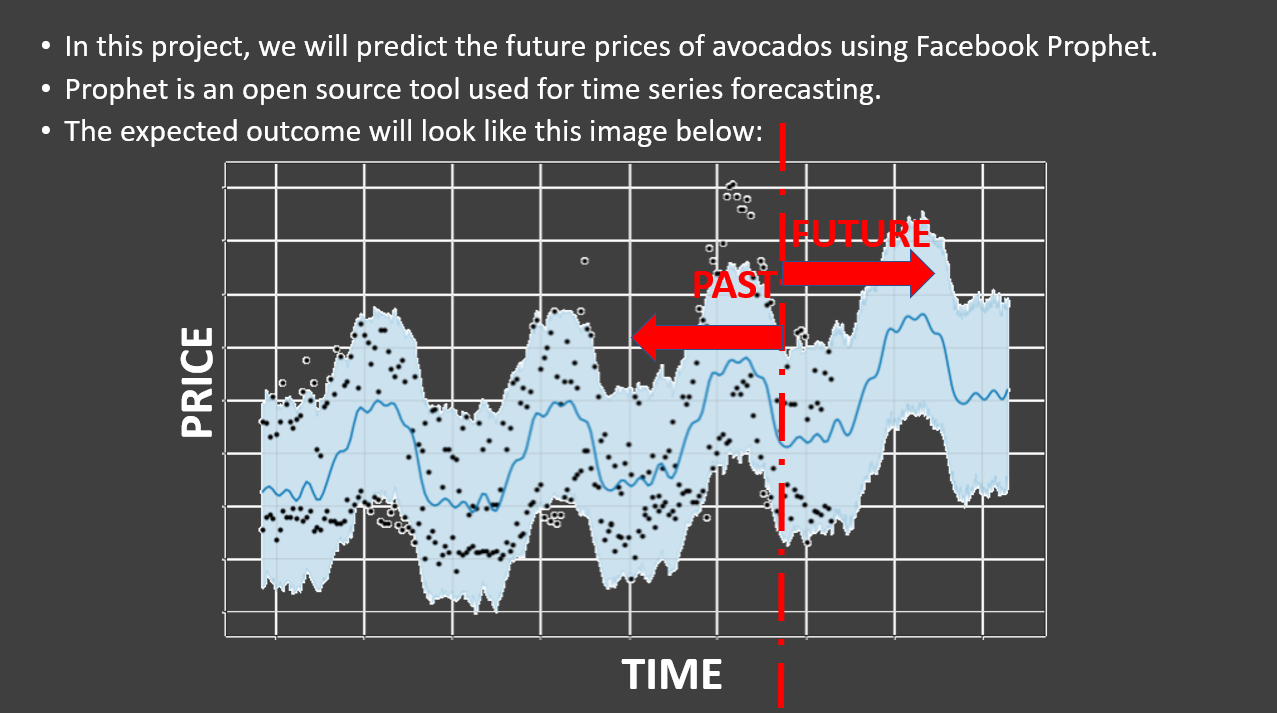


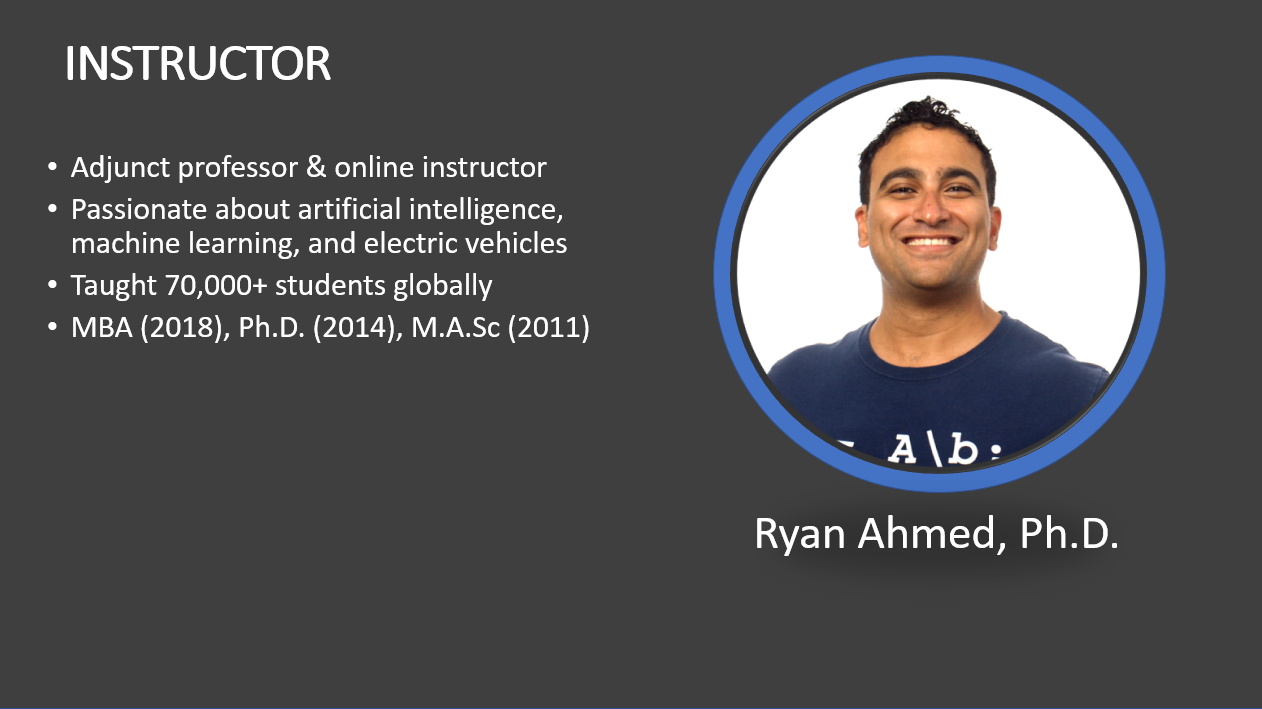

# TASK #2: IMPORT LIBRARIES AND DATASET

- You must install fbprophet package as follows: 
     pip install fbprophet
     
- If you encounter an error, try: 
    conda install -c conda-forge fbprophet



In [6]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet

In [16]:
# dataframes creation for both training and testing datasets 
data = pd.read_csv('avocado.csv')
df = pd.DataFrame(data)
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany


- Date: The date of the observation
- AveragePrice: the average price of a single avocado
- type: conventional or organic
- year: the year
- Region: the city or region of the observation
- Total Volume: Total number of avocados sold
- 4046: Total number of avocados with PLU 4046 sold
- 4225: Total number of avocados with PLU 4225 sold
- 4770: Total number of avocados with PLU 4770 sold

In [17]:
# Let's view the head of the training dataset
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [18]:
# Let's view the last elements in the training dataset
df.tail()

Date  AveragePrice  Total Volume     4046     4225    4770  \
18244  2018-02-04          1.63      17074.83  2046.96  1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70  3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92  2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63  2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77  2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    13498.67    13066.82      431.85          0.0  organic  2018   
18245     9264.84     8940.04      324.80          0.0  organic  2018   
18246     9394.11     9351.80       42.31          0.0  organic  2018   
18247    10969.54    10919.54       50.00          0.0  organic  2018   
18248    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

Summary Statistics

In [19]:
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 11569 to 8814
Data columns (total 13 columns):
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.9+ MB


Set Date column to datetime data type

In [38]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 11569 to 8814
Data columns (total 13 columns):
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.9+ MB


Perfect, it worked. Now let's check for any null values.

In [23]:
df.isnull().any()

Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

# TASK #3: EXPLORE DATASET  

In [24]:
df = df.sort_values('Date')
df.head()

Date  AveragePrice  Total Volume     4046      4225     4770  \
11569  2015-01-04          1.75      27365.89  9307.34   3844.81   615.28   
9593   2015-01-04          1.49      17723.17  1189.35  15628.27     0.00   
10009  2015-01-04          1.68       2896.72   161.68    206.96     0.00   
1819   2015-01-04          1.52      54956.80  3013.04  35456.88  1561.70   
9333   2015-01-04          1.64       1505.12     1.27   1129.50     0.00   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
11569    13598.46    13061.10      537.36          0.0       organic  2015   
9593       905.55      905.55        0.00          0.0       organic  2015   
10009     2528.08     2528.08        0.00          0.0       organic  2015   
1819     14925.18    11264.80     3660.38          0.0  conventional  2015   
9333       374.35      186.67      187.68          0.0       organic  2015   

                   region  
11569           Southeast  
9593              Chicago  
10009  HarrisburgScranton  
1819           Pittsburgh  
9333                Boise

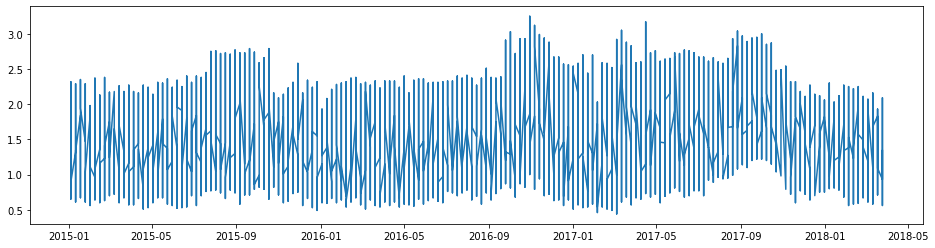

In [40]:
# Plot date and average price

# Set x & y values
x = df.Date
y = df.AveragePrice

# Set figure size
plt.figure(figsize = (16, 4))
# Plot y as a function of x
plt.plot(x,y)
plt.show()

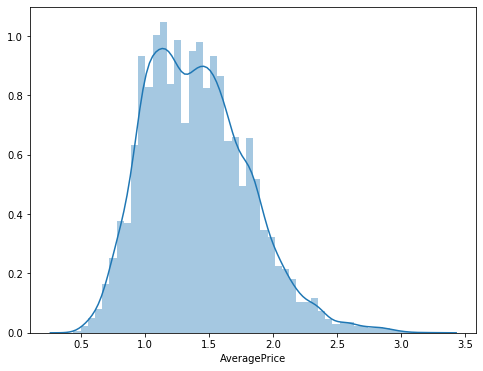

In [50]:
# Plot distribution of the average price

# Set figure size
plt.figure(figsize=(8,6))

# Plot distribution
sns.distplot(y)
plt.show()

This distribution is skewed a bit to the right with two slight modes. I imagine these two modes may represent conventional and organic, as organic avocados tend to be priced higher. 

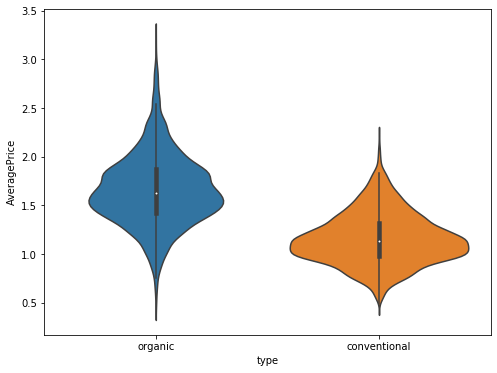

In [60]:
# Plot a violin plot of the average price vs. avocado type

# Set figure size
plt.figure(figsize=(8,6))
# Violin plot
sns.violinplot(y='AveragePrice', x='type', data=df)
plt.show()

We can see here, as we presumed, that the price distribution of organic avocados is higher than conventional avocados.

Next we'll take a look at the various regions as well as how many samples we have for each region.

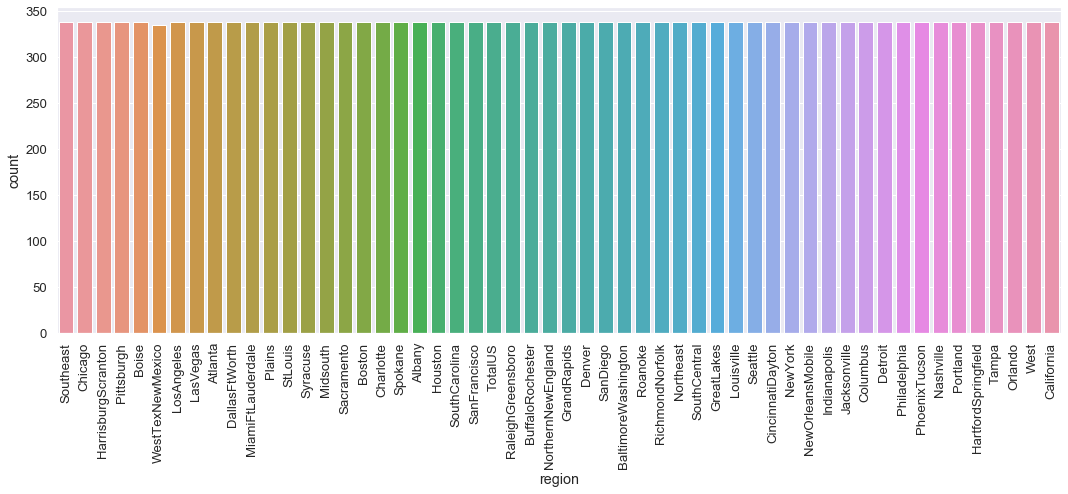

In [75]:
# Bar Chart to indicate the number of regions 

# Set font scale
sns.set(font_scale=1.2) 
# Set figure size
plt.figure(figsize=[18,6])
# Plot
sns.countplot(x = 'region', data = df)
# Rotate xtick labels 90 degrees
plt.xticks(rotation = 90)
# Show plot
plt.show()

We can see here that each of our regions all seem to have a similar number of data points or sample size--in the range of around 325-350 observations. 

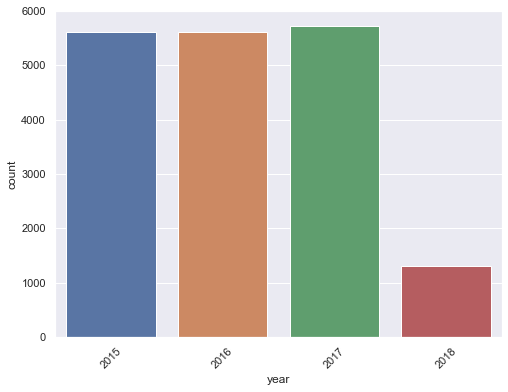

In [86]:
# Bar Chart to indicate the count in every year

# Reset font scale
sns.set(font_scale=1) 
# Set figure size
plt.figure(figsize=[8,6])
# Plot figure
sns.countplot(x = 'year', data = df)
# Rotate xtick labels 45 degrees
plt.xticks(rotation = 45)
# Show plot 
plt.show()

We can see here that we have a similar number of observations or data points for 2015-2016, with substantially fewer in 2018. It could be that our dataset was provided only a few months into 2018. We could easily see this by taking a look at the end of our dataset. So, let's go ahead and do that.

In [87]:
df.tail()

Date  AveragePrice  Total Volume        4046       4225  \
8574  2018-03-25          1.36     908202.13   142681.06  463136.28   
9018  2018-03-25          0.70    9010588.32  3999735.71  966589.50   
18141 2018-03-25          1.42     163496.70    29253.30    5080.04   
17673 2018-03-25          1.70     190257.38    29644.09   70982.10   
8814  2018-03-25          1.34    1774776.77    63905.98  908653.71   

            4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
8574   174975.75   127409.04   103579.41    22467.04      1362.59   
9018    30130.82  4014132.29  3398569.92   546409.74     69152.63   
18141       0.00   129163.36   109052.26    20111.10         0.00   
17673       0.00    89631.19    89424.11      207.08         0.00   
8814      843.45   801373.63   774634.09    23833.93      2905.61   

               type  year        region  
8574   conventional  2018       Chicago  
9018   conventional  2018  SouthCentral  
18141       organic  2018  SouthCentral  
17673       organic  2018    California  
8814   conventional  2018       NewYork

Confirmed. We can see that our data set for 2018 runs through March 25th, 2018.

We can also see here that when the average price was around half of what it usually is, total volume was significantly higher. There was such an abundance of crop, there was most likely higher supply than demand, so prices had to be dropped to sell the product. 

Now we'll take a look at avocado prices vs. regions for organic and conventional avocados.

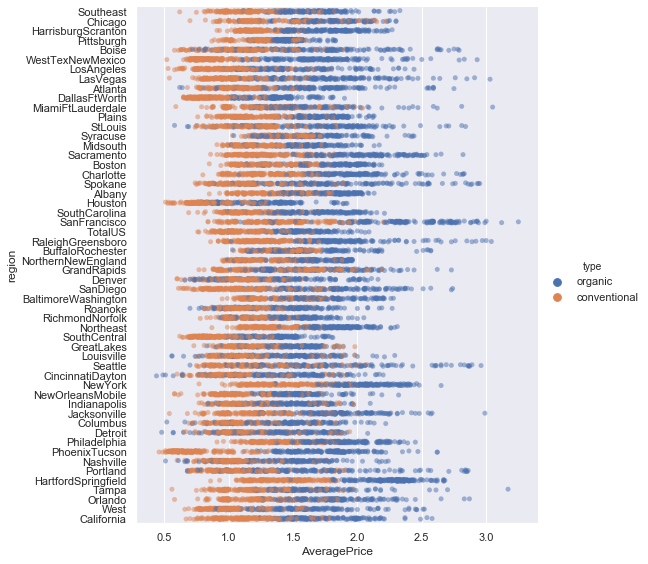

In [108]:
# Plot avocado prices vs. regions for organic vs. conventional avocados

# Plot
sns.catplot('AveragePrice', 'region', data=df, hue='type', height=8, alpha=0.5) 
plt.show()

We can easily see here that average prices across regions are overall lower for conventional and higher for organic. 

# TASK 4: PREPARE THE DATA BEFORE APPLYING FACEBOOK PROPHET TOOL 

In [111]:
# Create time series of average avocado price
ts = df[['Date','AveragePrice']]
ts

Date  AveragePrice
11569 2015-01-04          1.75
9593  2015-01-04          1.49
10009 2015-01-04          1.68
1819  2015-01-04          1.52
9333  2015-01-04          1.64
...          ...           ...
8574  2018-03-25          1.36
9018  2018-03-25          0.70
18141 2018-03-25          1.42
17673 2018-03-25          1.70
8814  2018-03-25          1.34

[18249 rows x 2 columns]

In [118]:
# Prepare the data into DS (datestring) and y format (our predictor variable)

ts = ts.rename(columns={'Date':'ds', 'AveragePrice': 'y'})
ts

ds     y
11569 2015-01-04  1.75
9593  2015-01-04  1.49
10009 2015-01-04  1.68
1819  2015-01-04  1.52
9333  2015-01-04  1.64
...          ...   ...
8574  2018-03-25  1.36
9018  2018-03-25  0.70
18141 2018-03-25  1.42
17673 2018-03-25  1.70
8814  2018-03-25  1.34

[18249 rows x 2 columns]

# TASK 5: UNDERSTAND INTUITION BEHIND FACEBOOK PROPHET

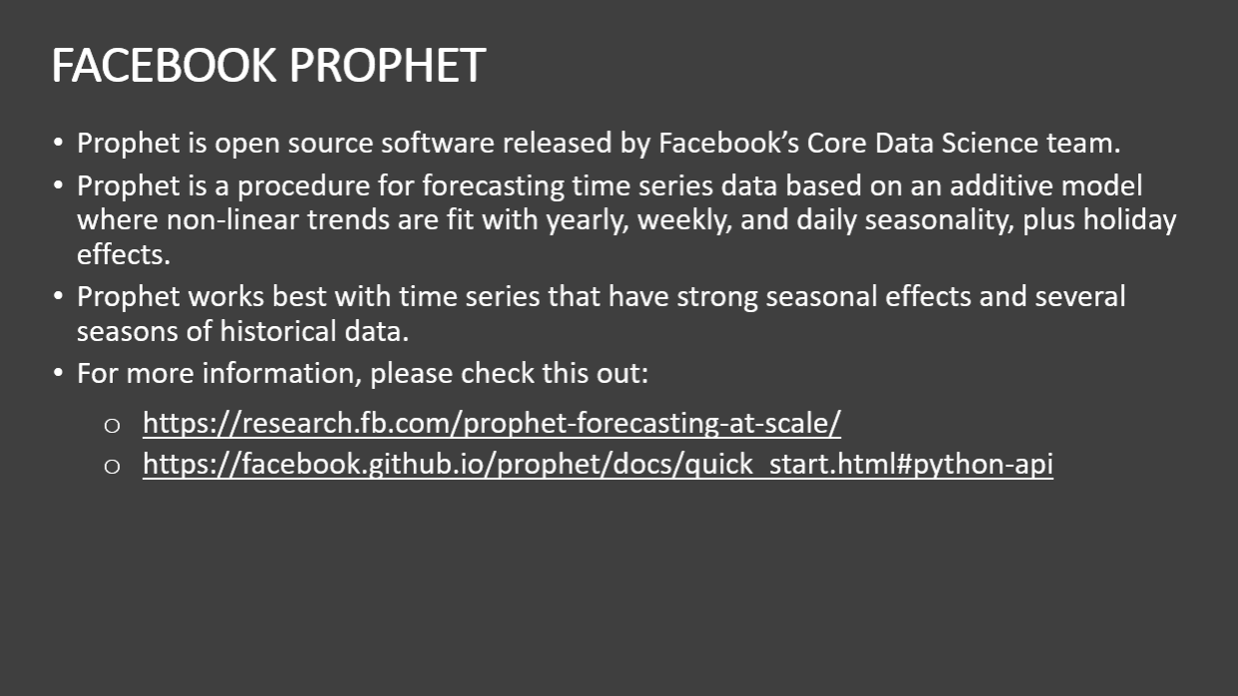

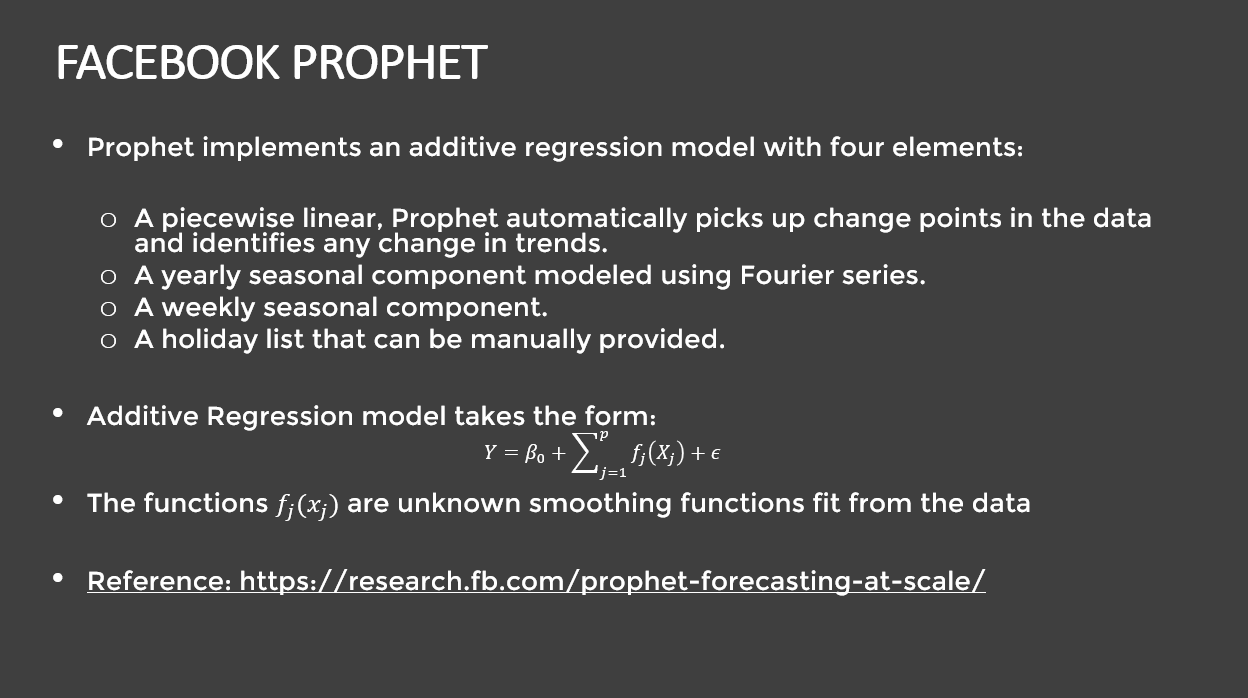

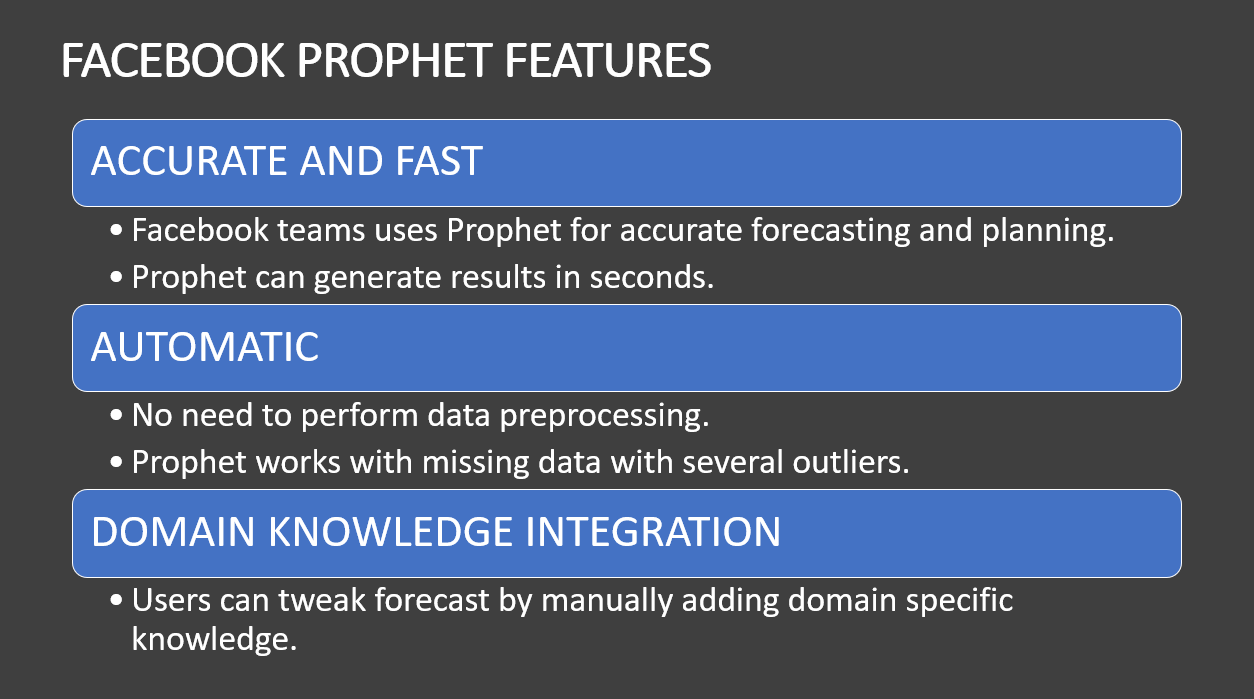

# TASK 6: DEVELOP MODEL AND MAKE PREDICTIONS - PART A

In [119]:
ts

ds     y
11569 2015-01-04  1.75
9593  2015-01-04  1.49
10009 2015-01-04  1.68
1819  2015-01-04  1.52
9333  2015-01-04  1.64
...          ...   ...
8574  2018-03-25  1.36
9018  2018-03-25  0.70
18141 2018-03-25  1.42
17673 2018-03-25  1.70
8814  2018-03-25  1.34

[18249 rows x 2 columns]

In [120]:
# Instantiate model
m = Prophet()

# Fit model to ts data
m.fit(ts)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [123]:
# Forcasting 1 yr into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [124]:
forecast

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0     2015-01-04  1.499120    0.891362    1.867940     1.499120     1.499120   
1     2015-01-04  1.499120    0.912681    1.868647     1.499120     1.499120   
2     2015-01-04  1.499120    0.893377    1.876148     1.499120     1.499120   
3     2015-01-04  1.499120    0.909770    1.866026     1.499120     1.499120   
4     2015-01-04  1.499120    0.894798    1.850444     1.499120     1.499120   
...          ...       ...         ...         ...          ...          ...   
18609 2019-03-21  1.162237    0.560837    1.572201     0.985397     1.351214   
18610 2019-03-22  1.161505    0.548125    1.618777     0.983358     1.351403   
18611 2019-03-23  1.160773    0.548694    1.597587     0.981321     1.351677   
18612 2019-03-24  1.160042    0.590147    1.630915     0.979757     1.351952   
18613 2019-03-25  1.159310    0.574642    1.620324     0.978193     1.352226   

       additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
0           -0.114387             -0.114387             -0.114387 -0.114387   
1           -0.114387             -0.114387             -0.114387 -0.114387   
2           -0.114387             -0.114387             -0.114387 -0.114387   
3           -0.114387             -0.114387             -0.114387 -0.114387   
4           -0.114387             -0.114387             -0.114387 -0.114387   
...               ...                   ...                   ...       ...   
18609       -0.086215             -0.086215             -0.086215 -0.086215   
18610       -0.084512             -0.084512             -0.084512 -0.084512   
18611       -0.082535             -0.082535             -0.082535 -0.082535   
18612       -0.080304             -0.080304             -0.080304 -0.080304   
18613       -0.077845             -0.077845             -0.077845 -0.077845   

       yearly_lower  yearly_upper  multiplicative_terms  \
0         -0.114387     -0.114387                   0.0   
1         -0.114387     -0.114387                   0.0   
2         -0.114387     -0.114387                   0.0   
3         -0.114387     -0.114387                   0.0   
4         -0.114387     -0.114387                   0.0   
...             ...           ...                   ...   
18609     -0.086215     -0.086215                   0.0   
18610     -0.084512     -0.084512                   0.0   
18611     -0.082535     -0.082535                   0.0   
18612     -0.080304     -0.080304                   0.0   
18613     -0.077845     -0.077845                   0.0   

       multiplicative_terms_lower  multiplicative_terms_upper      yhat  
0                             0.0                         0.0  1.384733  
1                             0.0                         0.0  1.384733  
2                             0.0                         0.0  1.384733  
3                             0.0                         0.0  1.384733  
4                             0.0                         0.0  1.384733  
...                           ...                         ...       ...  
18609                         0.0                         0.0  1.076022  
18610                         0.0                         0.0  1.076993  
18611                         0.0                         0.0  1.078238  
18612                         0.0                         0.0  1.079738  
18613                         0.0                         0.0  1.081465  

[18614 rows x 16 columns]

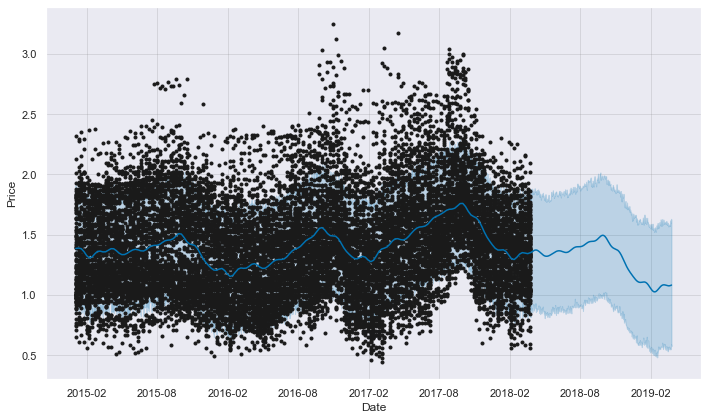

In [126]:
figure1 = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

The predicted decrease in demand doesn't look on track with the previous 3 year periods. Perhaps this is a conservative model or rather some holiday/event should be considered.

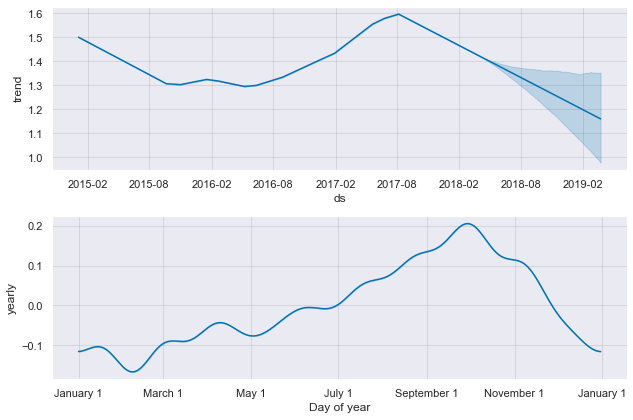

In [127]:
figure2 = m.plot_components(forecast)

We can see the trend goes down in the winter and then back up again. I think the model is making a mistake predicting that the price will continue to drop. On the contrary it should be going up again.

Perhaps it would be a good idea to separate out organic from conventional and see if that improves the model. As we know there is a significant difference in the pricing of the two, there may be a trend in one that is affecting the other and thus the model.  

# TASK 7: DEVELOP MODEL AND MAKE PREDICTIONS (REGION SPECIFIC) - PART B

In [128]:
# Dataset
df

Date  AveragePrice  Total Volume        4046       4225  \
11569 2015-01-04          1.75      27365.89     9307.34    3844.81   
9593  2015-01-04          1.49      17723.17     1189.35   15628.27   
10009 2015-01-04          1.68       2896.72      161.68     206.96   
1819  2015-01-04          1.52      54956.80     3013.04   35456.88   
9333  2015-01-04          1.64       1505.12        1.27    1129.50   
...          ...           ...           ...         ...        ...   
8574  2018-03-25          1.36     908202.13   142681.06  463136.28   
9018  2018-03-25          0.70    9010588.32  3999735.71  966589.50   
18141 2018-03-25          1.42     163496.70    29253.30    5080.04   
17673 2018-03-25          1.70     190257.38    29644.09   70982.10   
8814  2018-03-25          1.34    1774776.77    63905.98  908653.71   

            4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
11569     615.28    13598.46    13061.10      537.36         0.00   
9593        0.00      905.55      905.55        0.00         0.00   
10009       0.00     2528.08     2528.08        0.00         0.00   
1819     1561.70    14925.18    11264.80     3660.38         0.00   
9333        0.00      374.35      186.67      187.68         0.00   
...          ...         ...         ...         ...          ...   
8574   174975.75   127409.04   103579.41    22467.04      1362.59   
9018    30130.82  4014132.29  3398569.92   546409.74     69152.63   
18141       0.00   129163.36   109052.26    20111.10         0.00   
17673       0.00    89631.19    89424.11      207.08         0.00   
8814      843.45   801373.63   774634.09    23833.93      2905.61   

               type  year              region  
11569       organic  2015           Southeast  
9593        organic  2015             Chicago  
10009       organic  2015  HarrisburgScranton  
1819   conventional  2015          Pittsburgh  
9333        organic  2015               Boise  
...             ...   ...                 ...  
8574   conventional  2018             Chicago  
9018   conventional  2018        SouthCentral  
18141       organic  2018        SouthCentral  
17673       organic  2018          California  
8814   conventional  2018             NewYork  

[18249 rows x 13 columns]

In [129]:
# Select specific region

ca_df = df[df['region'] == 'California']
ca_df

Date  AveragePrice  Total Volume        4046        4225  \
9489  2015-01-04          1.24     142349.77   107490.73    25711.96   
363   2015-01-04          0.93    5777334.90  2843648.26  2267755.26   
9488  2015-01-11          1.10     158110.68   123712.51    25975.27   
362   2015-01-11          0.92    6024932.34  2889591.29  2485720.10   
9487  2015-01-18          1.24     195207.60   123138.29    58616.16   
...          ...           ...           ...         ...         ...   
8552  2018-03-11          1.11    6488605.43  2277437.31  1750118.87   
17674 2018-03-18          1.75     202790.74    29398.11    70514.05   
8551  2018-03-18          1.02    6802084.11  2161037.82  2305253.24   
8550  2018-03-25          1.04    6687009.44  1932162.02  2715163.60   
17673 2018-03-25          1.70     190257.38    29644.09    70982.10   

            4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
9489        2.93     9144.15     9144.15        0.00         0.00   
363    137479.64   528451.74   477193.38    47882.56      3375.80   
9488        1.47     8421.43     8421.43        0.00         0.00   
362    103573.42   546047.53   510560.41    31874.03      3613.09   
9487        0.00    13453.15    13453.15        0.00         0.00   
...          ...         ...         ...         ...          ...   
8552   108244.33  2352804.92  2230913.33    41105.34     80786.25   
17674       8.08   102870.50   102717.50      153.00         0.00   
8551    94087.86  2241705.19  2116307.93    38597.17     86800.09   
8550    92955.04  1946728.78  1827362.50    37434.21     81932.07   
17673       0.00    89631.19    89424.11      207.08         0.00   

               type  year      region  
9489        organic  2015  California  
363    conventional  2015  California  
9488        organic  2015  California  
362    conventional  2015  California  
9487        organic  2015  California  
...             ...   ...         ...  
8552   conventional  2018  California  
17674       organic  2018  California  
8551   conventional  2018  California  
8550   conventional  2018  California  
17673       organic  2018  California  

[338 rows x 13 columns]

In [135]:
ca_df = ca_df.sort_values('Date')
ca_df

Date  AveragePrice  Total Volume        4046        4225  \
9489  2015-01-04          1.24     142349.77   107490.73    25711.96   
363   2015-01-04          0.93    5777334.90  2843648.26  2267755.26   
9488  2015-01-11          1.10     158110.68   123712.51    25975.27   
362   2015-01-11          0.92    6024932.34  2889591.29  2485720.10   
9487  2015-01-18          1.24     195207.60   123138.29    58616.16   
...          ...           ...           ...         ...         ...   
8552  2018-03-11          1.11    6488605.43  2277437.31  1750118.87   
17674 2018-03-18          1.75     202790.74    29398.11    70514.05   
8551  2018-03-18          1.02    6802084.11  2161037.82  2305253.24   
8550  2018-03-25          1.04    6687009.44  1932162.02  2715163.60   
17673 2018-03-25          1.70     190257.38    29644.09    70982.10   

            4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
9489        2.93     9144.15     9144.15        0.00         0.00   
363    137479.64   528451.74   477193.38    47882.56      3375.80   
9488        1.47     8421.43     8421.43        0.00         0.00   
362    103573.42   546047.53   510560.41    31874.03      3613.09   
9487        0.00    13453.15    13453.15        0.00         0.00   
...          ...         ...         ...         ...          ...   
8552   108244.33  2352804.92  2230913.33    41105.34     80786.25   
17674       8.08   102870.50   102717.50      153.00         0.00   
8551    94087.86  2241705.19  2116307.93    38597.17     86800.09   
8550    92955.04  1946728.78  1827362.50    37434.21     81932.07   
17673       0.00    89631.19    89424.11      207.08         0.00   

               type  year      region  
9489        organic  2015  California  
363    conventional  2015  California  
9488        organic  2015  California  
362    conventional  2015  California  
9487        organic  2015  California  
...             ...   ...         ...  
8552   conventional  2018  California  
17674       organic  2018  California  
8551   conventional  2018  California  
8550   conventional  2018  California  
17673       organic  2018  California  

[338 rows x 13 columns]

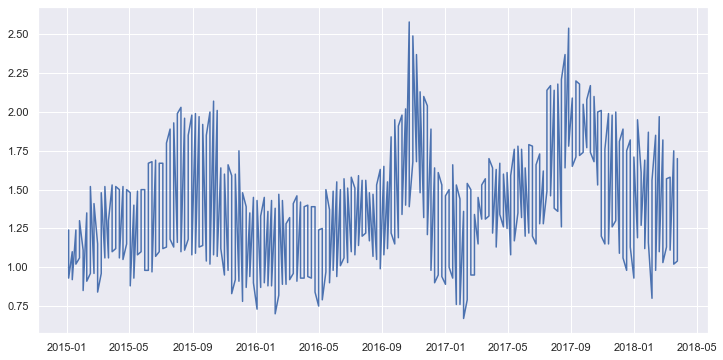

In [139]:
# Plot timeseries for California grown avocados

plt.figure(figsize=(12,6))
plt.plot(ca_df['Date'], ca_df['AveragePrice']);

In [140]:
# Create time series
ca_ts = ca_df[['Date','AveragePrice']]
ca_ts = ca_ts.rename(columns={'Date':'ds', 'AveragePrice': 'y'})
ca_ts

ds     y
9489  2015-01-04  1.24
363   2015-01-04  0.93
9488  2015-01-11  1.10
362   2015-01-11  0.92
9487  2015-01-18  1.24
...          ...   ...
8552  2018-03-11  1.11
17674 2018-03-18  1.75
8551  2018-03-18  1.02
8550  2018-03-25  1.04
17673 2018-03-25  1.70

[338 rows x 2 columns]

In [141]:
# Instantiate & fit model

m = Prophet()
m.fit(ca_ts)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [142]:
# Forcast 1yr into future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

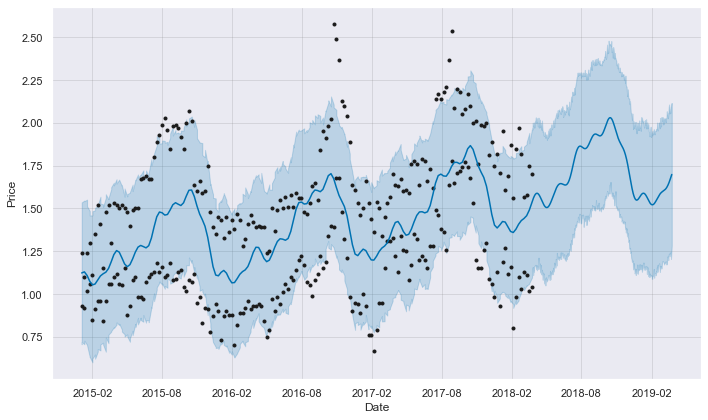

In [143]:
# Plot forecast

figure3 = m.plot(forecast, xlabel='Date', ylabel='Price')

This looks a lot better as far as forecasted model looking realistic and like it fits the trend of the data (as compared to our timeseries for ALL regions).

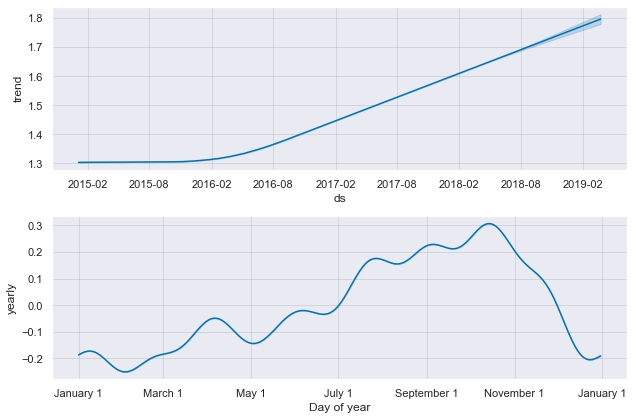

In [144]:
figure4 = m.plot_components(forecast)

We can see here in the decomposition plot that yearly there is a rise in prices in the fall and drop in prices in the winter. We can also see that there is an overall trend of increased prices in California. Being a Californian, I have denifinitely seen this increase in prices of avocados over the years. They have become hugely popular as well.  

# GREAT JOB!